# DATA EXPLORATORY ANALYSIS AND HYPOTHESISTESTING FOR INSURANCE CLAIMS DATA



In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## import dataset

In [33]:
claims =  pd.read_csv("C:/Users/Jayanto Debnath/Downloads/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv")
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [34]:
demographics = pd.read_csv("C:/Users/Jayanto Debnath/Downloads/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")
demographics.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


### Q.1

In [35]:
combine = pd.merge(right = claims,
                   left = demographics, 
                   right_on = "customer_id", 
                   left_on = "CUST_ID",
                   how = "outer"
                  )
combine.drop(columns = ["customer_id"], inplace = True)
combine.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


### Q.2

In [36]:
combine["DateOfBirth"] = pd.to_datetime(combine.DateOfBirth, format = "%d-%b-%y")
combine["claim_date"] = pd.to_datetime(combine.claim_date, format = "%m/%d/%Y")
combine["Contact"] = pd.to_numeric(combine.Contact.str.replace("-",""),downcast='float')
combine

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,$3059,4.0,Yes
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,$1520,2.0,No
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,$23575,2.0,Yes
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,$25120,1.0,No


### Q.3

In [37]:
combine["claim_amount"] = pd.to_numeric(combine.claim_amount.str.replace("$",""),downcast='float')
combine.head(2)

C:\Users\Jayanto Debnath\AppData\Local\Temp\ipykernel_7528\1407567813.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combine["claim_amount"] = pd.to_numeric(combine.claim_amount.str.replace("$",""),downcast='float')


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No


### Q.4

In [38]:
combine["Flag"] = np.where(combine.police_report=='Unknown',1,0)
combine

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,0
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,1


### Q.5

In [39]:
combine = combine.groupby('CUST_ID').first().reset_index(drop = True)
combine.head(1)


,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,0


### Q.6

In [40]:
combine.isna().sum()

gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
Flag                    0
dtype: int64

In [41]:
cat_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent",]
con_col = ["claim_amount"]

In [42]:
combine["incident_cause"].isna().sum()

7

In [43]:
for col in cat_col:
    combine[col] = combine[col].fillna(combine[col].mode()[0])
combine[con_col] = combine[con_col].fillna(combine[con_col].mean())
combine.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,1
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0


In [44]:
combine["State"].isna().sum()

0

### Q.7


In [45]:
combine["Age"] = (pd.DatetimeIndex(combine.claim_date).year - pd.DatetimeIndex(combine.DateOfBirth).year)
combine.loc[(combine.Age < 18) & (combine.Age >0),'Age_Group'] = 'Children'
combine.loc[(combine.Age >=18) & (combine.Age <30),'Age_Group'] = 'Youth'
combine.loc[(combine.Age >=30) & (combine.Age <60),'Age_Group'] = 'Adult'
combine.loc[(combine.Age >=60),'Age_Group'] = 'Senior'
combine

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age,Age_Group
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12470.501953,1.0,Yes,0,40.0,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,0,46.0,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,1,29.0,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,0,47.0,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,0,38.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,2065-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,0,-47.0,NaN
1081,Female,2066-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,0,-48.0,NaN
1082,Female,2063-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,0,-45.0,NaN
1083,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,0,22.0,Youth


### Q.8

In [46]:
combine.groupby('Segment')['claim_amount'].mean().reset_index()

,Segment,claim_amount
0,Gold,12755.710938
1,Platinum,12370.138672
2,Silver,12271.163086


### Q.9

In [47]:
combine[combine.claim_date < "2018-09-10"].groupby('incident_cause')['claim_amount'].mean().reset_index()

,incident_cause,claim_amount
0,Crime,7317.803223
1,Driver error,13949.940430
2,Natural causes,7632.011719
3,Other causes,14550.931641
4,Other driver error,14556.168945


###  Q.10

In [48]:
combine.loc[(combine.incident_cause.str.lower().str.contains("driver") & ((combine.State == "TX") | (combine.State == "DE") | (combine.State == "AK"))),:].groupby("State")["State"].count()


State
AK    10
DE    15
TX    10
Name: State, dtype: int64

### Q.11

array([<AxesSubplot:ylabel='Female'>, <AxesSubplot:ylabel='Male'>],
      dtype=object)

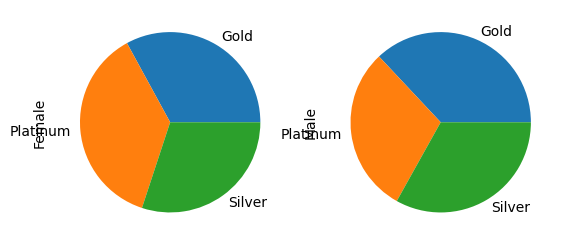

In [49]:
pie = combine.groupby(['Segment','gender'])['claim_amount'].sum().reset_index()
pie.pivot(index="Segment", columns= "gender", values= "claim_amount").plot(kind = "pie", subplots= True, legend= False)

### Q.12

<AxesSubplot:xlabel='gender'>

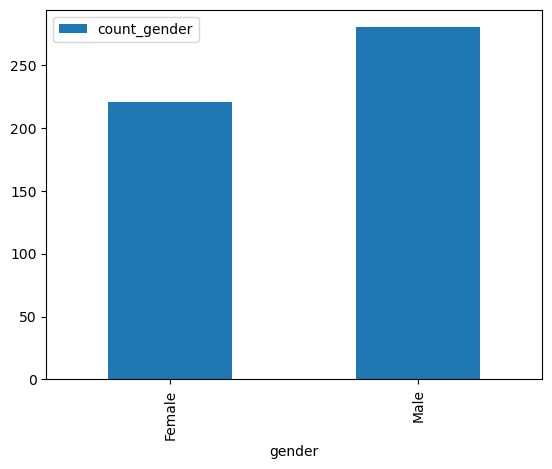

In [50]:
bar = combine[(combine.incident_cause.str.lower().str.contains("driver", na=False))].groupby(["gender"])[["gender"]].count().add_prefix("count_").reset_index()
pd.pivot_table(bar,index="gender",values="count_gender").plot(kind = "bar")

### Q.13

<AxesSubplot:xlabel='Age_Group'>

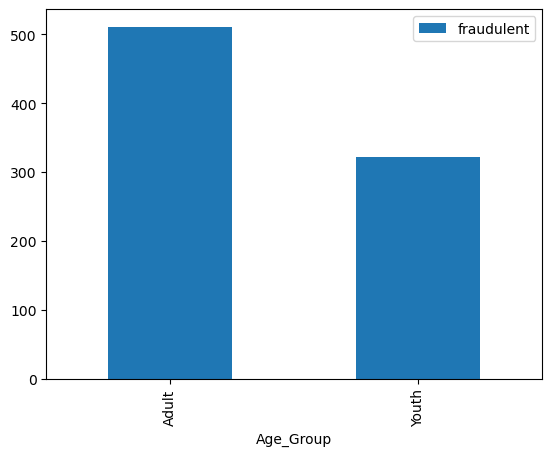

In [51]:
bar2 = combine.groupby('Age_Group')['fraudulent'].count().reset_index()
pd.pivot_table(bar2,index="Age_Group",values="fraudulent").plot(kind = "bar")

### Q.14

<AxesSubplot:xlabel='Month_num'>

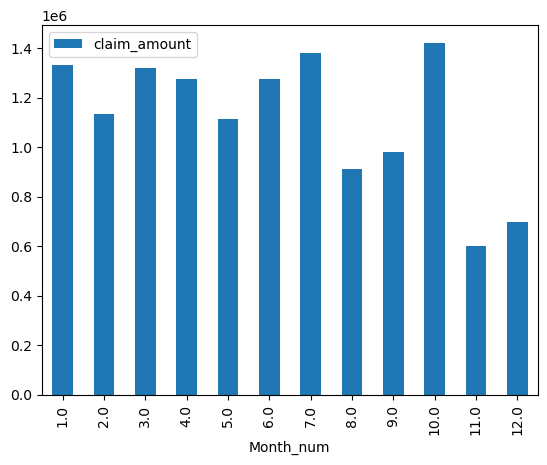

In [52]:
combine['Month_num'] = pd.DatetimeIndex(combine.claim_date).month
trend = combine.groupby('Month_num')['claim_amount'].sum().reset_index()
pd.pivot_table(trend,index='Month_num',values="claim_amount").plot(kind = "bar")

### Q.15

array([<AxesSubplot:title={'center':'Fraud_claim_amount'}, xlabel='gender,Age_Group'>,
       <AxesSubplot:title={'center':'Non_Fraud_claim_amount'}, xlabel='gender,Age_Group'>],
      dtype=object)

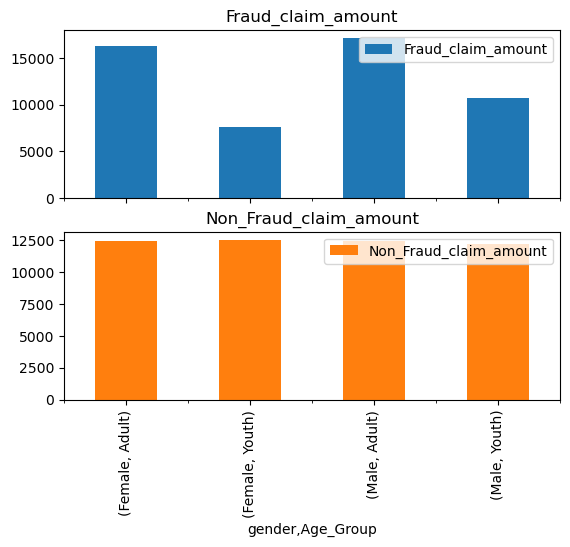

In [53]:
f = combine[(combine.fraudulent=="Yes")].groupby(["gender","Age_Group"])[["claim_amount"]].mean().add_prefix("Fraud_")
nf = combine[(combine.fraudulent=="No")].groupby(["gender","Age_Group"])[["claim_amount"]].mean().add_prefix("Non_Fraud_")
f_nf=round(pd.merge(f,nf,on=["gender","Age_Group"]),2)
f_nf.plot(kind="bar", subplots= True, legend= True)

### Q.16

In [55]:
female = combine['claim_amount'].loc[combine['gender']=="Female"]
male = combine['claim_amount'].loc[combine['gender']=="Male"]
st.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=-0.8854215458922358, pvalue=0.3761258631331673)

### Q.17

In [58]:
c = pd.crosstab(combine.Age_Group, combine.Segment, margins = True)
st.chi2_contingency(observed= c)

(2.367098046289905,
 0.8830349397478972,
 6,
 array([[177.89915966, 170.53781513, 162.56302521, 511.        ],
        [112.10084034, 107.46218487, 102.43697479, 322.        ],
        [290.        , 278.        , 265.        , 833.        ]]))

### Q.18

In [60]:
combine['year'] = pd.DatetimeIndex(combine.claim_date).year
CY = combine.loc[combine.year == 2018]["claim_amount"]
PY = combine.loc[combine.year == 2017]["claim_amount"]
CY.corr(other= PY)

nan

### Q.19

In [61]:
a1 = combine['total_policy_claims'].loc[combine['Age_Group']=="Youth"]
a2 = combine['total_policy_claims'].loc[combine['Age_Group']=="Adult"]
st.f_oneway(a1,a2)

F_onewayResult(statistic=nan, pvalue=nan)

### Q.20

In [62]:
combine.total_policy_claims.corr(other= combine.claim_amount)

-0.014369036618012723